Real: 0.0025761059759436306
Detector: 0.002513274122871835
CFO vector: [0.         0.00062832 0.00125664 0.00188496 0.00251327 0.00314159]


/home/cddelong/sdr/sdr-notebooks/notebooks/../py_utils/framing.py:156: ComplexWarning: Casting complex values to real discards the imaginary part
  normalization = (self._preamble_norm * window_norm).astype(np.float32)
/home/cddelong/miniconda3/envs/dsp/lib/python3.11/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/cddelong/miniconda3/envs/dsp/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


'Plot results'

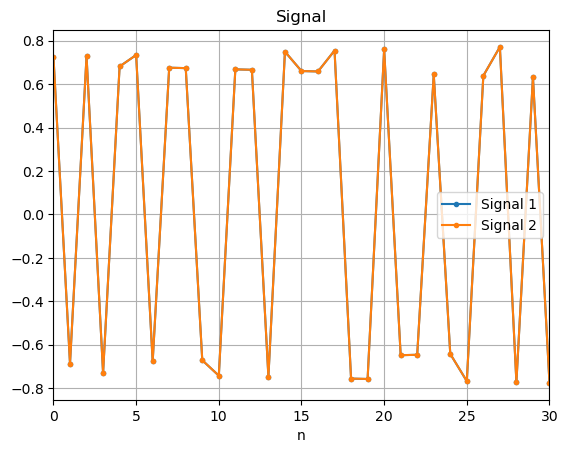

In [1]:

#################################### DETECTION TESTING ####################################

import sys
sys.path.insert(0, '..')

from scipy import signal
import numpy as np
from py_utils import *

# np.random.seed(0)

"""Generate Frames"""
preamble = zadoff_chu(31)
preamble = modulate_qpsk(pn(31*2))
payload = modulate_qpsk(np.random.randint(2, size=10))
len_payload = 5
frames = to_frames(preamble, payload, len_payload)

"""Apply channel"""
sig = np.concatenate((np.zeros(10), frames[0], np.zeros(100)))
# sig = apply_fto(frames, 200)
# sig = np.concat(frames)
# sig = apply_awgn(sig, 10)
# sig = apply_sto(sig, 0.2)
pct = 0.041
# sig = apply_cfo(sig, pct)
w_off = pct*2*np.pi/100
sig = apply_cfo(sig, w_offset=w_off)


"""Run frame detector"""
t = 0.6 # threshold
fd = AcquisitionFrameDetector(preamble, len(preamble), t)
res = fd.process(sig)[0]
first_detected_frame = res.frame
plot_signal(first_detected_frame, sig[10:10+len(preamble)])
print(f"Real: {w_off}\nDetector: {res.cfo}")
print(f"CFO vector: {fd.cfo_vector}")


"""Plot results"""
# t_vec = t * np.ones_like(sig)
# plot_signal(cfd.debug[0], sig*0.3, t_vec, n_samps=len(sig))
# plot_signal(cfd.debug[1], cfd.debug[2])

# pdcc = PhaseDriftCFOCorrector(preamble, detection_threshold=t, detector_cls=AcquisitionFrameDetector)
# pdcc.process(sig)
# print(pdcc.get_estimate()/(2*np.pi))
# plot_signal(pdcc.debug[0], preamble)



# frames_out = np.concatenate(frames)
# frames_in = np.concatenate(detected_frames)

# plot_signal(frames_out, frames_in)




